In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

from mpl_finance import candlestick_ohlc
import datetime
import matplotlib.dates as mpl_dates

C:\Users\shaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
start = "2010-01-01"
end = "2015-12-31"

# df = yf.download("AAPL", start=start, end=end)
df = yf.download("AAPL",start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23,26.817499,27.212500,26.799999,27.152500,24.785440,130629600
2015-12-24,27.250000,27.250000,26.987499,27.007500,24.653078,54281600
2015-12-28,26.897499,26.922501,26.545000,26.705000,24.376949,106816800
2015-12-29,26.740000,27.357500,26.715000,27.184999,24.815104,123724800
2015-12-30,27.145000,27.174999,26.795000,26.830000,24.491053,100855200


In [4]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


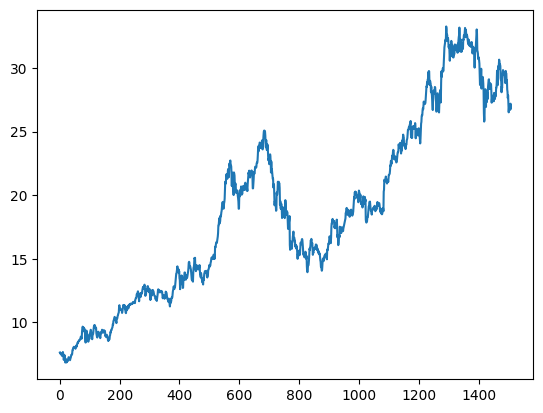

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
1504,26.817499,27.212500,26.799999,27.152500,130629600
1505,27.250000,27.250000,26.987499,27.007500,54281600
1506,26.897499,26.922501,26.545000,26.705000,106816800
1507,26.740000,27.357500,26.715000,27.184999,123724800


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1504    28.526475
1505    28.509950
1506    28.488500
1507    28.472525
1508    28.452025
Name: Close, Length: 1509, dtype: float64

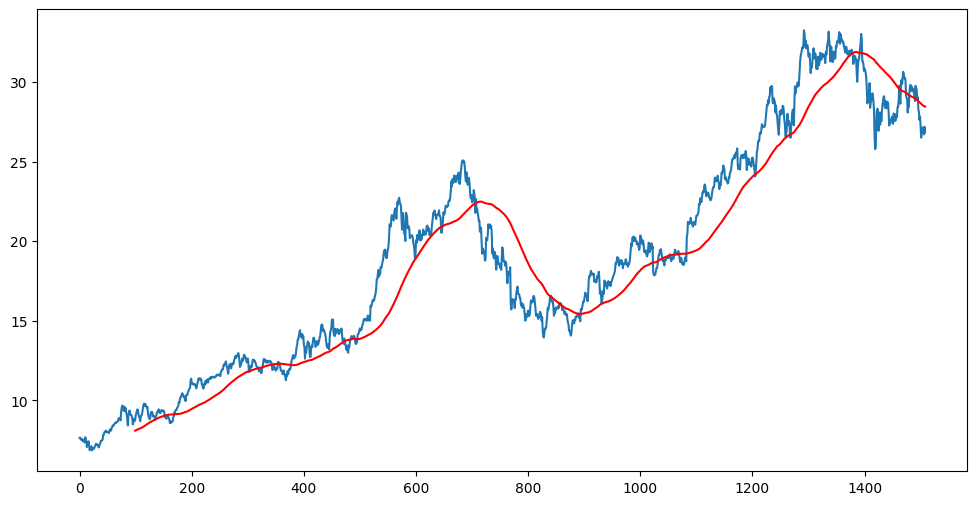

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1504    30.129975
1505    30.109450
1506    30.088487
1507    30.068225
1508    30.043575
Name: Close, Length: 1509, dtype: float64

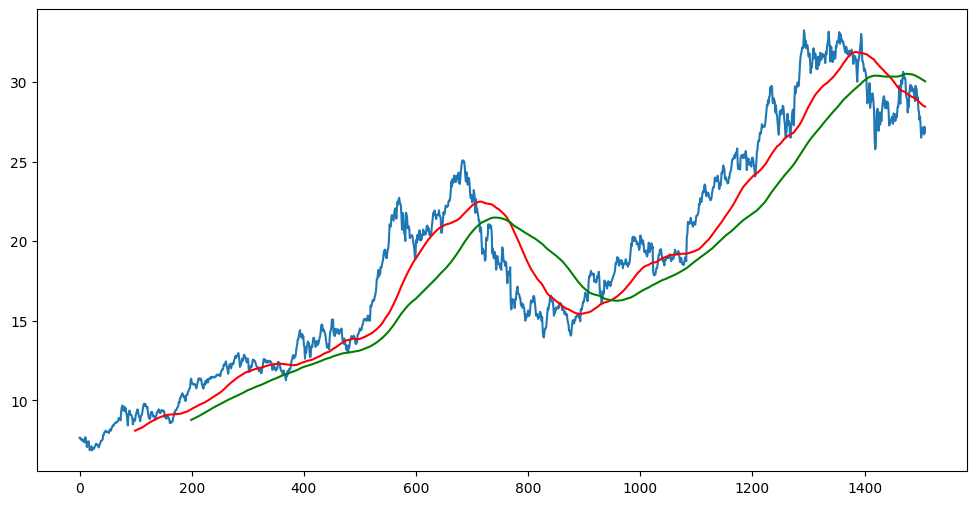

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(1509, 5)

In [15]:
#Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1056, 1)
(453, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
1056,18.812143
1057,18.978571
1058,18.973572
1059,18.882143
1060,19.031071


In [18]:
# Scaling the data.(b/w 0 and 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04305457],
       [0.04378   ],
       [0.03709439],
       ...,
       [0.67554155],
       [0.66385646],
       [0.65217138]])

In [20]:
data_training_array.shape

(1056, 1)

In [21]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
    

In [22]:
x_train.shape

(956, 100, 1)

In [23]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1))) #last '1' shows number of column
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
30/30 [==============================] - 24s 440ms/step - loss: 0.0822
Epoch 2/50
30/30 [==============================] - 12s 404ms/step - loss: 0.0132
Epoch 3/50
30/30 [==============================] - 12s 390ms/step - loss: 0.0116
Epoch 4/50
30/30 [==============================] - 11s 374ms/step - loss: 0.0097
Epoch 5/50
30/30 [==============================] - 11s 380ms/step - loss: 0.0110
Epoch 6/50
30/30 [==============================] - 11s 373ms/step - loss: 0.0090
Epoch 7/50
30/30 [==============================] - 12s 414ms/step - loss: 0.0087
Epoch 8/50
30/30 [==============================] - 11s 363ms/step - loss: 0.0083
Epoch 9/50
30/30 [==============================] - 12s 402ms/step - loss: 0.0085
Epoch 10/50
30/30 [==============================] - 12s 395ms/step - loss: 0.0072
Epoch 11/50
30/30 [==============================] - 12s 402ms/step - loss: 0.0086
Epoch 12/50
30/30 [==============================] - 11s 363ms/step - loss: 0.0080
Epoch 13/50
3

In [27]:
# model.save('Keras_model.h5')

In [28]:
data_testing.head()

,Close
1056,18.812143
1057,18.978571
1058,18.973572
1059,18.882143
1060,19.031071


In [29]:
data_training.tail(100)

,Close
956,18.620001
957,18.566786
958,18.748571
959,18.996786
960,18.784286
...,...
1051,18.961430
1052,19.146070
1053,19.164642
1054,18.951786


In [30]:
past_100_days = data_training.tail(100)

In [31]:
# final_df = past_100_days.append(data_testing,ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [32]:
final_df.head()

,Close
0,18.620001
1,18.566786
2,18.748571
3,18.996786
4,18.784286


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05004415],
       [0.04658879],
       [0.0583925 ],
       [0.07450959],
       [0.06071156],
       [0.069802  ],
       [0.0391911 ],
       [0.05825342],
       [0.0531515 ],
       [0.04695984],
       [0.06254352],
       [0.05952881],
       [0.04902377],
       [0.02947448],
       [0.04818891],
       [0.04468723],
       [0.04691352],
       [0.04835127],
       [0.06581335],
       [0.0584621 ],
       [0.04371316],
       [0.04584669],
       [0.03529521],
       [0.0495339 ],
       [0.04642643],
       [0.05556332],
       [0.07796483],
       [0.10709154],
       [0.13053672],
       [0.11931274],
       [0.15430638],
       [0.15124535],
       [0.15797043],
       [0.13969665],
       [0.15456151],
       [0.15252074],
       [0.14280412],
       [0.14090256],
       [0.12673347],
       [0.13385275],
       [0.12803214],
       [0.11824592],
       [0.10361302],
       [0.11418766],
       [0.16304906],
       [0.15743714],
       [0.14869446],
       [0.139

In [34]:
input_data.shape

(553, 1)

In [35]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(453, 100, 1)
(453,)


In [37]:
#Making Predictions

y_predicted = model.predict(x_test)


15/15 [==============================] - 3s 142ms/step


In [38]:
y_predicted.shape

(453, 1)

In [39]:
y_test

array([0.06252036, 0.07332684, 0.07300224, 0.06706558, 0.07673576,
       0.09139194, 0.10484209, 0.09276009, 0.08738001, 0.08598857,
       0.08571041, 0.09709663, 0.09918372, 0.09046432, 0.07430078,
       0.05493714, 0.05486766, 0.07082239, 0.05496042, 0.0459859 ,
       0.05078625, 0.04215949, 0.04459447, 0.05834606, 0.07279355,
       0.07402262, 0.05790553, 0.15766898, 0.16733929, 0.21870514,
       0.21462361, 0.20942905, 0.21265257, 0.21520334, 0.23463659,
       0.21944724, 0.21462361, 0.20455922, 0.19887769, 0.2157832 ,
       0.21793976, 0.21819489, 0.20648394, 0.22663613, 0.24305466,
       0.24333295, 0.24704331, 0.24926948, 0.26517789, 0.29184646,
       0.28808966, 0.31445666, 0.3089375 , 0.29884982, 0.31946569,
       0.33634804, 0.3422151 , 0.33808724, 0.36204255, 0.37097076,
       0.36463989, 0.33915407, 0.32275869, 0.33769303, 0.33574515,
       0.33736843, 0.33217387, 0.31675256, 0.31545388, 0.30652568,
       0.30782435, 0.31659019, 0.33412187, 0.34954319, 0.35912

In [40]:
y_predicted

array([[0.12370789],
       [0.12287146],
       [0.12207246],
       [0.12134743],
       [0.12070044],
       [0.12014419],
       [0.11970146],
       [0.11939639],
       [0.11923991],
       [0.11922199],
       [0.11933638],
       [0.11956907],
       [0.11989269],
       [0.12028976],
       [0.12076682],
       [0.1212767 ],
       [0.12176955],
       [0.1221963 ],
       [0.12252848],
       [0.1227365 ],
       [0.12280366],
       [0.12272625],
       [0.1224909 ],
       [0.12210298],
       [0.12161332],
       [0.12109324],
       [0.12057211],
       [0.12006023],
       [0.11963533],
       [0.11937319],
       [0.11933441],
       [0.11955951],
       [0.12008201],
       [0.12092414],
       [0.12201647],
       [0.12336178],
       [0.1249879 ],
       [0.12711506],
       [0.13019107],
       [0.13438839],
       [0.13994777],
       [0.14687893],
       [0.15496197],
       [0.16390829],
       [0.17330678],
       [0.18278569],
       [0.19187006],
       [0.200

In [41]:
scaler.scale_

array([0.06493205])

In [44]:
scale_factor = 1/0.06493205
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

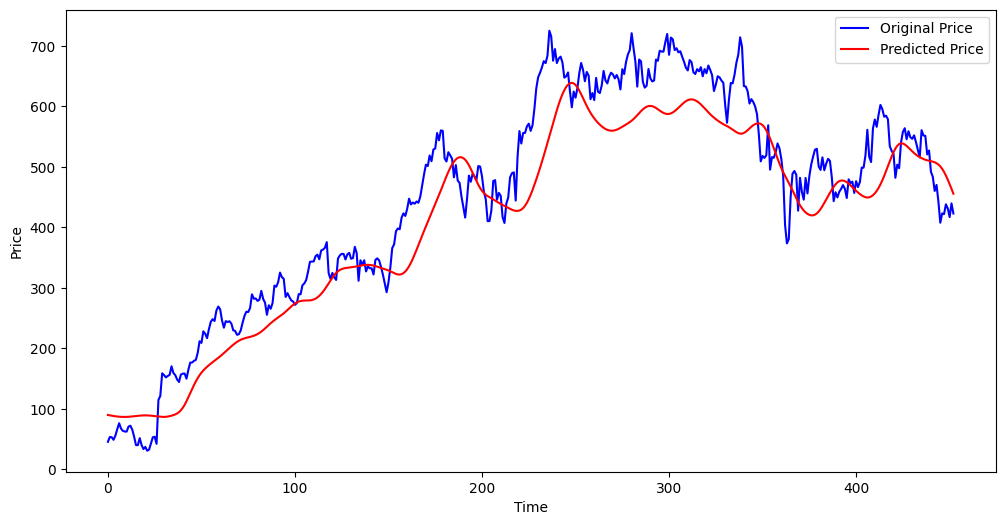

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label = 'Original Price')
plt.plot(y_predicted, 'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()